<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/u6_series_de_tiempo_con_pandas_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 6 - Datetime y Intro a Series de tiempo con pandas

# Inicializamos

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

pd.options.display.max_rows = 30
pd.options.display.min_rows = 30


## Dates y Times en Python


Tres tipos de datos importantes:

- *Timestamps* Refieren a momentos partirulares en el tiempo (e.g., July 4th, 2021 at 7:00 a.m.).

- *Time deltas* o *durations* referencian un largo de tiempo exacto (cantidad de tiempo) (e.g., una duracion de 22.56 segundos). No involucran fechas, sino cantidad.

- *Time intervals* y *periods* referencian un largo de tiempo específico entre un comienzo y fin; por ejemplo, el mes de Junio 2021. Los períodos refieren a casos especiales de intervalos de tiempos en donde cada intervalo es de largo uniforme y no se superponen (e.g., periodos de 24 horas de largo de todo del día) (Conceptos mayormente en pandas).

Vamos a ver ejemplos de como trabajar con cada uno de estas maneras de referirse a las fecha y el tiempo.

### Nativos de python: datetime


In [ ]:
from datetime import datetime

d = datetime(year=2021, month=7, day=4)

d

datetime.datetime(2021, 7, 4, 0, 0)

In [ ]:
x = datetime.strptime("2020-01-23", "%Y-%M-%d")
x

datetime.datetime(2020, 1, 23, 0, 1)

In [ ]:
d.strftime('%A')

'Sunday'

In [ ]:
x.strftime('%A')

'Thursday'

In [ ]:
# construir por argumentos con varios parametros
dt = datetime(2023, 10, 24, 15, 34, 10, 87743)
dt


datetime.datetime(2023, 10, 24, 15, 34, 10, 87743)

In [ ]:
# se puede construir desde una cadena con varios parametros
dt = datetime.strptime("24/10/2023 15:34:10.87743", "%d/%m/%Y %H:%M:%S.%f")

In [ ]:
dt

datetime.datetime(2023, 10, 24, 15, 34, 10, 877430)

In [ ]:
# construir con la fecha actual en UTC
dt = datetime.now()

dt

datetime.datetime(2024, 11, 8, 21, 3, 24, 321084)

In [ ]:
# que time zone tiene?
dt.astimezone().tzinfo


datetime.timezone(datetime.timedelta(0), 'UTC')

In [ ]:
## para convertir la hora usando el time zone argentina

import pytz
tzarg = pytz.timezone("America/Buenos_Aires")

dtarg = dt.astimezone(tzarg)

dtarg

datetime.datetime(2024, 11, 8, 18, 3, 24, 321084, tzinfo=<DstTzInfo 'America/Buenos_Aires' -03-1 day, 21:00:00 STD>)

In [ ]:
# datetime con timezone en -3 utc
dtarg.isoformat()

'2024-11-08T18:03:24.321084-03:00'

In [ ]:
## para convertir la hora -3 UTC
from datetime import timezone, timedelta
tzm3 = timezone(timedelta(hours=-3))

dtm3 = dt.astimezone(tzm3)

dtm3


datetime.datetime(2024, 11, 8, 18, 3, 24, 321084, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=75600)))

Para formatear fechas se puede ver [`strftime` ](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).
Para ver el manejo completo de fechas y tiempo en python se puede ver: [`datetime`](https://docs.python.org/3/library/datetime.html).

Numpy tienen su propio tipo de datos para manejar fechas y tiempo.

## timedelta

Para representar cantidad de tiempo se puede usar el tiempo `timedelta`

In [ ]:
# tipo de dato delta

# como sumar tiempos?
dt = datetime(2023, 11, 9)

delta = timedelta(days = 1, seconds = 2)
delta

datetime.timedelta(days=1, seconds=2)

In [ ]:

# sumamos momento a una cantidad de tiempo
dt2 = dt + delta

# el momento en datetime
print(dt, type(dt))

# la cantidad de tempo
print(delta, type(delta))

# el nuevo momento
print(dt2, type(dt))


2023-11-09 00:00:00 <class 'datetime.datetime'>
1 day, 0:00:02 <class 'datetime.timedelta'>
2023-11-10 00:00:02 <class 'datetime.datetime'>


In [ ]:
type(delta)

datetime.timedelta

### NumPy: arrays de datetime64

NumPy `datetime64` dtype guarda los dates como enteros de 64-bit.

Para crear un array de `datetime64` lo hacemos con: `dtype=np.datetime64`

In [ ]:
import numpy as np

np.datetime64('2021-07-04')



numpy.datetime64('2021-07-04')

In [ ]:

date = np.array(['2021-07-04'], dtype=np.datetime64)
date

array(['2021-07-04'], dtype='datetime64[D]')

Ahora podemos hacer operacions de numpy. Por ejemplo sumar 1 `datetime64[D]` genera nuevos fachas con un día extra.

In [ ]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

El tipo de datos datetime64 de numpy esta acompañado de una `resolución` y solo puede representar como máximo $2^{64}$ unidades de esa resolución. Ej: $2^{64}$ dias, $2^{64}$ horas, $2^{64}$ nanosegudos, etc.

### Resolución del datetime en numpy

numpy puede inferir la resolución y si no, se puede indicar con un parametro extra.

In [ ]:
# datetime64 basados en días
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [ ]:
# datetime64 basados en minutos

np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

Se puede indicar / forzar la resolución con un parametro extra:

In [ ]:
np.datetime64('2021-07-04 12:00', 'ms')

numpy.datetime64('2021-07-04T12:00:00.000')

La resolucion es importante por afecta como se comporta con las operaciones

In [ ]:
np.datetime64('2021-07-04') + 1

numpy.datetime64('2021-07-05')

In [ ]:
np.datetime64('2021-07-04', 'm') + 1

numpy.datetime64('2021-07-04T00:01')

Podemos ver la resolución por la forma en que se muestra el valor sin formateos.
O podemos de forma mas clara al hacer un array.

In [ ]:
np.array(np.datetime64('2021-07-04 12:00'))

array('2021-07-04T12:00', dtype='datetime64[m]')

In [ ]:
np.array(np.datetime64('2021-07-04 12:00', 'ns'))

array('2021-07-04T12:00:00.000000000', dtype='datetime64[ns]')

La siguiente tabla de la documentación muestra los rangos soportados por `datetime64`:

|Code  | Meaning     | Time span (relative) | Time span (absolute)   |
|------|-------------|----------------------|------------------------|
| `Y`  | Year        | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| `M`  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| `W`  | Week        | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| `D`  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| `h`  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| `m`  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| `s`  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| `ms` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| `us` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| `ns` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| `ps` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| `fs` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| `as` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

 Un valor practico por defecto es `datetime64[ns]`, porque es capas de representar un rango de fechas actuales y con mucha presición. Más información se encuentra en [NumPy `datetime64`](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Dates y Times en Pandas

Pandas provees un objeto `Timestamp`, que posee la eficiencia de `numpy.datetime64` y agrega más funciones de utilidad a `datetime` estandar de python.




In [ ]:
date = pd.to_datetime("2021/Jun/14")
date

Timestamp('2021-06-14 00:00:00')

In [ ]:
date.strftime('%A')

'Monday'

In [ ]:
type(date)

pandas._libs.tslibs.timestamps.Timestamp

Ademas podemos realizar las misma operaciones vectorizadas que con numpy:

**to_datetime**() también funciona con Series

In [ ]:
ds = pd.Series(["2011-01-03","2011-01-04","2011-01-05","2011-01-06", None])
ds

,0
0,2011-01-03
1,2011-01-04
2,2011-01-05
3,2011-01-06
4,None


In [ ]:
# para convertir las cadenas en datetime
ds = pd.to_datetime(ds, format="%Y-%m-%d")
ds

,0
0,2011-01-03
1,2011-01-04
2,2011-01-05
3,2011-01-06
4,NaT


In [ ]:
type(ds.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
ds2 = pd.Series(["2011-01-03","2011-01-04","2011-01-05","2011-01-06", "sin valor"])
ds2

,0
0,2011-01-03
1,2011-01-04
2,2011-01-05
3,2011-01-06
4,sin valor


In [ ]:
ds3 = pd.to_datetime(ds2, format="%Y-%m-%d", errors="coerce")
ds3

,0
0,2011-01-03
1,2011-01-04
2,2011-01-05
3,2011-01-06
4,NaT


### Pandas timedelta

Pandas tiene su version de timedelta

In [ ]:
ddelta = pd.to_timedelta("1 days 5 hours")
ddelta

Timedelta('1 days 05:00:00')

In [ ]:
ds + ddelta

,0
0,2011-01-04 05:00:00
1,2011-01-05 05:00:00
2,2011-01-06 05:00:00
3,2011-01-07 05:00:00
4,NaT


In [ ]:
type(ddelta)

pandas._libs.tslibs.timedeltas.Timedelta

Tambien existe to_timedelta() para trabajar con cantidades de tiempo en series de pandas.

In [ ]:
deltas = pd.to_timedelta(np.arange(12), 'D')

deltas

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

Como con los tipos de python podemos realizar peraciones

---



In [ ]:
pd.to_datetime("2023/11/09") + deltas

DatetimeIndex(['2023-11-09', '2023-11-10', '2023-11-11', '2023-11-12',
               '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-18', '2023-11-19', '2023-11-20'],
              dtype='datetime64[ns]', freq=None)

## Lectura de fechas en archivos csv

In [ ]:
%%file my_file.csv
fecha,valor
2020-12-10,3.3
2020-12-12,3.2
2020-12-13,3.1
2020-12-14,3.7
2020-12-15,4.1
2020-12-16,4.7

Overwriting my_file.csv


In [ ]:
!ls

my_file.csv  sample_data


In [ ]:
dff = pd.read_csv("my_file.csv")
dff

,fecha,valor
0,2020-12-10,3.3
1,2020-12-12,3.2
2,2020-12-13,3.1
3,2020-12-14,3.7
4,2020-12-15,4.1
5,2020-12-16,4.7


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   6 non-null      object 
 1   valor   6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


Con parse_dates indicamos que columnas hay que tratar como fechas, con date_format indicamos cada columna que formato tiene.

In [ ]:
dff2 = pd.read_csv("my_file.csv",
                   parse_dates=["fecha"],
                   date_format={"fecha": "%Y-%m-%d"})
dff2

,fecha,valor
0,2020-12-10,3.3
1,2020-12-12,3.2
2,2020-12-13,3.1
3,2020-12-14,3.7
4,2020-12-15,4.1
5,2020-12-16,4.7


In [ ]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   6 non-null      datetime64[ns]
 1   valor   6 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 224.0 bytes


In [ ]:
dff2 = pd.read_csv("my_file.csv", parse_dates=["fecha"])
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   6 non-null      datetime64[ns]
 1   valor   6 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 224.0 bytes


Si el metod de lectura (read_csv. read_json, etc) no cuenta con funcionalidades para el manejo de fechas. Siempre podemos hacerlo columna por columna (manualmente)

In [ ]:
dff3 = pd.read_csv("my_file.csv")
dff3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   6 non-null      object 
 1   valor   6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


In [ ]:
# usamos datetime para converir a datetime
pd.to_datetime(dff3["fecha"])

,fecha
0,2020-12-10
1,2020-12-12
2,2020-12-13
3,2020-12-14
4,2020-12-15
5,2020-12-16


In [ ]:
dff3["fecha"] = pd.to_datetime(dff3["fecha"])
dff3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   6 non-null      datetime64[ns]
 1   valor   6 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 224.0 bytes


In [ ]:
dff3

,fecha,valor
0,2020-12-10,3.3
1,2020-12-12,3.2
2,2020-12-13,3.1
3,2020-12-14,3.7
4,2020-12-15,4.1
5,2020-12-16,4.7


In [ ]:
dff3["valor"]

,valor
0,3.3
1,3.2
2,3.1
3,3.7
4,4.1
5,4.7


In [ ]:
dff3.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
dff4 = dff3.set_index("fecha")

In [ ]:
dff4

,valor
fecha,
2020-12-10,3.3
2020-12-12,3.2
2020-12-13,3.1
2020-12-14,3.7
2020-12-15,4.1
2020-12-16,4.7


In [ ]:
dff4.index

DatetimeIndex(['2020-12-10', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16'],
              dtype='datetime64[ns]', name='fecha', freq=None)

## Pandas Time Series: Indexar usando el tiempo

Para tranbajar con series de tiempos es conveniente utilizar Series cuyos indices estan compuestos por Datetimes. Dichos indices se controlan en objetos
`DatetimeIndex`

In [ ]:
# fecha       valor
# 2020-12-10  3.3
# 2020-12-12  3.2
# 2020-12-13  3.1
# 2020-12-14  3.7
# 2020-12-15  4.1
# 2020-12-16  4.7

In [ ]:
sindex = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04', '2021-08-04'])
data = pd.Series([1.3, 1.2, 2.2, 2.6], index=sindex)
data

,0
2020-07-04,1.3
2020-08-04,1.2
2021-07-04,2.2
2021-08-04,2.6


In [ ]:
data.index

DatetimeIndex(['2020-07-04', '2020-08-04', '2021-07-04', '2021-08-04'], dtype='datetime64[ns]', freq=None)

Al trabajar con Indices `DatetimeIndex`, podemos usar cadenas para acceder a los valores, dichas cadenas son interpretadas como fechas automaticamente:


In [ ]:
data['2020-07-04':'2021-07-04']

,0
2020-07-04,1.3
2020-08-04,1.2
2021-07-04,2.2


O por ejemplo, pasan solo un año para obtener todos valores con fechas de ese año.

In [ ]:
data['2021']

,0
2021-07-04,2.2
2021-08-04,2.6


## Estructuras de datos de Time Series en Pandas

Tipos de Indices:

- Para estampas de tiempos o momentos (*time stamps*), Pandas provee el  tipo `Timestamp`. Es un reemplazo para el `datetime` nativo de Python, pero esta basado en el funcionamiento del tipo  `numpy.datetime64`. La estrucutra `Index` asociada es `DatetimeIndex`.
- Para *time deltas* o *durations* (deltas de tiempo, duraciones o cantidad de tiempo), Pandas provee el tipo `Timedelta`. `Timedelta` de pandas es un reemplazo más eficiente que `datetime.timedelta` y esta basado en `numpy.timedelta64`. La estructura de Index asociada es `TimedeltaIndex`.




Los más comunes son los objetos `Timestamp` and `DatetimeIndex`.

* Se pueden usar direcamente pero lo mas comun es crearlos usando `pd.to_datetime` (similar a to_numeric)

* Pasando un simple valor a `pd.to_datetime` retorna un `Timestamp`

* Pasando un lista de valores por defecto retorna un `DatetimeIndex`

Veamos algunos ejemplos de Timestamp

In [ ]:
# para un fecha o valor
pd.to_datetime(datetime(2021, 7, 3))

Timestamp('2021-07-03 00:00:00')

In [ ]:
# para multiples valores, en distintos formatos
dates = pd.to_datetime([datetime(2021, 7, 3),
                        '14th of July, 2021',
                        '2021-Jul-6',
                        '07-07-2021',
                        '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-14', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

### timedelta de pandas

`TimeDelta` y `TimedeltaIndex` pueden ser creados con `pd.to_timedelta`. Pero tambien se crean al realizar restas entre Datetimes.

In [ ]:
pd.to_timedelta('15 days 2 hours')

Timedelta('15 days 02:00:00')

In [ ]:
# o restando fechas
dates - dates[0]


TimedeltaIndex(['0 days', '11 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Secuencias regulares con: pd.date_range

Para crear secuencias de fechas usamos `pd.date_range` para timestamps y `pd.timedelta_range` para time deltas.

`pd.date_range` accepta una fecha de comienzo, una fecha de fin, y un parametro opcional `frequency` para crear la secuencia regular de fechas.

In [ ]:
# si no especificamos se toma como frecuencia 'D' (dias)
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

En vez de usar fecha de fin se puede usar `periods`

In [ ]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

El espaciado entre fechas se puede controlar con el argumento `freq`, que por defecto es `D`.

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='h')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

Para crear una secuencia regular de valores `Period` o `Timedelta`, se usan las funciones similares `pd.period_range` y `pd.timedelta_range`.

Crear una secuencia de 6 rangos de tiempo incrementales de 0 a 5 horas

In [ ]:
pd.timedelta_range(0, periods=6, freq='h')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='h')

In [ ]:
pd.date_range('2015-07', periods=8, freq='ME')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
pd.date_range('2015-07', periods=8, freq='BYE')

DatetimeIndex(['2015-12-31', '2016-12-30', '2017-12-29', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'],
              dtype='datetime64[ns]', freq='BYE-DEC')

## Frecuencias y Desplazamientos (Frequency and offsets)

Los conceptos de *frequency* or *date offset* son importantes en pandas.

Asi como con los códigos `D` simbolizamos (day) y con `H` simbolizamos (hour) hay varias opciones extra elegir y combinar:

| Code | Description       | Code | Description          |
|------|-------------------|------|----------------------|
| `D`  | Calendar day      | `B`  | Business day         |
| `W`  | Weekly            |      |                      |
| `M`  | Month end         | `BM` | Business month end   |
| `Q`  | Quarter end       | `BQ` | Business quarter end |
| `A`  | Year end          | `BA` | Business year end    |
| `H`  | Hours             | `BH` | Business hours       |
| `T`  | Minutes           |      |                      |
| `S`  | Seconds           |      |                      |
| `L`  | Milliseconds       |      |                      |
| `U`  | Microseconds      |      |                      |
| `N`  | Nanoseconds       |      |                      |

## Operaciones con series tiempo



In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.options.display.max_rows = 30
pd.options.display.min_rows = 30

In [ ]:
# yfinance es una libreria de yahoo que permite acceder a datos de finanzas

!pip install yfinance


In [ ]:
import yfinance as yf

# datos de la bolsa de google
df = yf.download('GOOG', start='2018-01-01', end='2022-12-31').reset_index()

df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2018-01-02 00:00:00+00:00,53.119549,53.250000,53.347000,52.261501,52.417000,24752000
1,2018-01-03 00:00:00+00:00,53.991409,54.124001,54.314499,53.160500,53.215500,28604000
2,2018-01-04 00:00:00+00:00,54.186928,54.320000,54.678501,54.200100,54.400002,20092000
3,2018-01-05 00:00:00+00:00,54.976486,55.111500,55.212502,54.599998,54.700001,25582000
4,2018-01-08 00:00:00+00:00,55.211411,55.347000,55.563499,55.081001,55.111500,20952000
5,2018-01-09 00:00:00+00:00,55.177494,55.313000,55.528500,55.061550,55.470001,18050000
6,2018-01-10 00:00:00+00:00,54.995441,55.130501,55.230000,54.805500,54.855000,20856000
7,2018-01-11 00:00:00+00:00,55.140587,55.276001,55.326248,54.979500,55.314999,19566000
8,2018-01-12 00:00:00+00:00,55.975533,56.112999,56.214500,55.057499,55.120499,34410000


Nos quedamos solo con los valores de cierre

In [ ]:
goog = df.set_index("Date")

goog

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2018-01-02 00:00:00+00:00,53.119549,53.250000,53.347000,52.261501,52.417000,24752000
2018-01-03 00:00:00+00:00,53.991409,54.124001,54.314499,53.160500,53.215500,28604000
2018-01-04 00:00:00+00:00,54.186928,54.320000,54.678501,54.200100,54.400002,20092000
2018-01-05 00:00:00+00:00,54.976486,55.111500,55.212502,54.599998,54.700001,25582000
2018-01-08 00:00:00+00:00,55.211411,55.347000,55.563499,55.081001,55.111500,20952000
2018-01-09 00:00:00+00:00,55.177494,55.313000,55.528500,55.061550,55.470001,18050000
2018-01-10 00:00:00+00:00,54.995441,55.130501,55.230000,54.805500,54.855000,20856000
2018-01-11 00:00:00+00:00,55.140587,55.276001,55.326248,54.979500,55.314999,19566000


In [ ]:
sp500 = goog['Close']

sp500

Ticker,GOOG
Date,
2018-01-02 00:00:00+00:00,53.250000
2018-01-03 00:00:00+00:00,54.124001
2018-01-04 00:00:00+00:00,54.320000
2018-01-05 00:00:00+00:00,55.111500
2018-01-08 00:00:00+00:00,55.347000
2018-01-09 00:00:00+00:00,55.313000
2018-01-10 00:00:00+00:00,55.130501
2018-01-11 00:00:00+00:00,55.276001
2018-01-12 00:00:00+00:00,56.112999


Podemos visualizar la serie con matplotlib

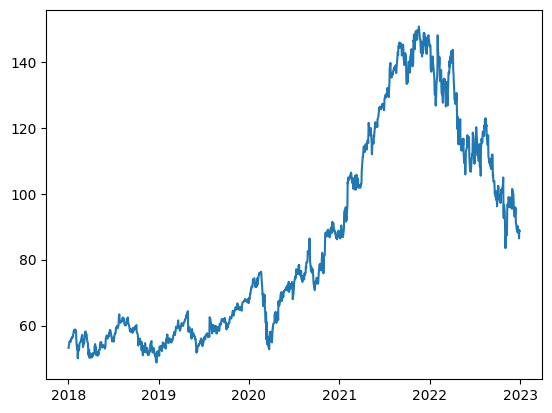

In [ ]:
plt.plot(sp500);

### Resampling y conversion de frecuencias

En series de tiempo resamplear los datos (resampling) es cambiar la frecuencia con que los datos "aparecen".

Si hacemos aparecer más fechas, le dicemos **up-sampling** si quitamos fechas le decimos **down-sampling**.

Se puede resamplear de dos maneras con `resample` o con `asfreq`.

* `asfreq` es "seleccion de datos"
* `resample` es fundamentalmente una "agregacion de datos",



## Ejemplo de Downsampling

In [ ]:
# comenzamos con un "sampleo" diario de dias laborales
sp500.head(30)

Ticker,GOOG
Date,
2018-01-02 00:00:00+00:00,53.250000
2018-01-03 00:00:00+00:00,54.124001
2018-01-04 00:00:00+00:00,54.320000
2018-01-05 00:00:00+00:00,55.111500
2018-01-08 00:00:00+00:00,55.347000
2018-01-09 00:00:00+00:00,55.313000
2018-01-10 00:00:00+00:00,55.130501
2018-01-11 00:00:00+00:00,55.276001
2018-01-12 00:00:00+00:00,56.112999


In [ ]:
# BA o BYE: Last bussiness anual day
# resampleamos al dia final laboral del año con freq

ba_asfreq = sp500.asfreq('BYE') #old BYE is the old BA
ba_asfreq

Ticker,GOOG
Date,
2018-12-31 00:00:00+00:00,51.780499
2019-12-31 00:00:00+00:00,66.850998
2020-12-31 00:00:00+00:00,87.594002
2021-12-31 00:00:00+00:00,144.679504
2022-12-30 00:00:00+00:00,88.730003


## Usando Resample

* `resample` es fundamentalmente una "agregacion de datos", (simil groupBy) pero con indices DatetimeIndex, TimeDeltaIndex

Documentación de [Resampler](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html)

In [ ]:
sp500

Ticker,GOOG
Date,
2018-01-02 00:00:00+00:00,53.250000
2018-01-03 00:00:00+00:00,54.124001
2018-01-04 00:00:00+00:00,54.320000
2018-01-05 00:00:00+00:00,55.111500
2018-01-08 00:00:00+00:00,55.347000
2018-01-09 00:00:00+00:00,55.313000
2018-01-10 00:00:00+00:00,55.130501
2018-01-11 00:00:00+00:00,55.276001
2018-01-12 00:00:00+00:00,56.112999


In [ ]:
# con resample
sp500.resample('BYE')



In [ ]:
# resampleamos tomando valores promedios
ba_resampled = sp500.resample('BYE').mean()
ba_resampled

Ticker,GOOG
Date,
2018-12-31 00:00:00+00:00,55.661257
2019-12-31 00:00:00+00:00,59.419653
2020-12-31 00:00:00+00:00,74.070191
2021-12-31 00:00:00+00:00,125.530687
2022-12-30 00:00:00+00:00,115.193719


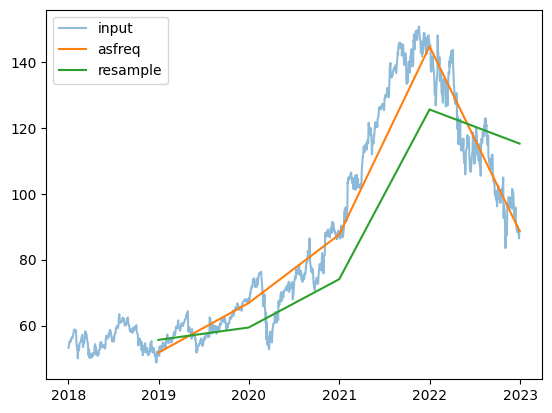

In [ ]:
plt.plot(sp500, alpha=0.5)

plt.plot(ba_asfreq);
plt.plot(ba_resampled)

plt.legend(['input', 'asfreq', 'resample'],
           loc='upper left');

Notar la diferencia: en cada punto, `resample` reporta el *promedio del año anterior*, mientas que `asfreq` reporta el *valor al final del año*.

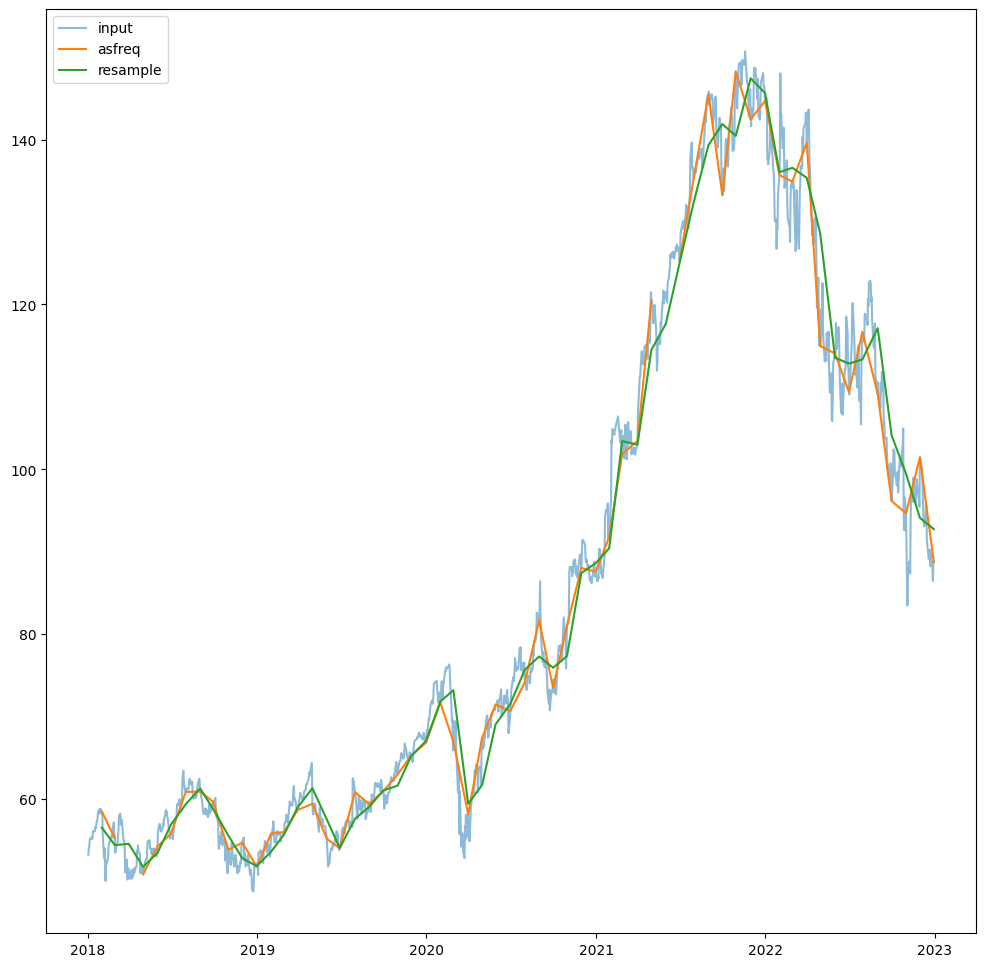

In [ ]:
# BME: Business Monthly End

r2 = sp500.resample('BME').mean()
af2 = sp500.asfreq('BME')

plt.figure(figsize=(12,12))
plt.plot(sp500, alpha=0.5)
plt.plot(af2)
plt.plot(r2)
plt.legend(['input', 'asfreq', 'resample'],
           loc='upper left');

## Upsampling

Ambos agregan datos a los datos originales, por tanto los nuevos datos generados por defecto crean valores NA.

Por ejemplo `asfreq` acepta un argumento `method` que especifica como completar los valores.


Como ejemplo resamplemos los días laborales a todos los dias (incluyendo los días de fines de semana)

In [ ]:
# que pasa al  hacer upsampling

data = sp500.iloc[:20]
data.asfreq("D")

Ticker,GOOG
Date,
2018-01-02 00:00:00+00:00,53.250000
2018-01-03 00:00:00+00:00,54.124001
2018-01-04 00:00:00+00:00,54.320000
2018-01-05 00:00:00+00:00,55.111500
2018-01-06 00:00:00+00:00,NaN
2018-01-07 00:00:00+00:00,NaN
2018-01-08 00:00:00+00:00,55.347000
2018-01-09 00:00:00+00:00,55.313000
2018-01-10 00:00:00+00:00,55.130501


Notar como aparecieron valores NA.



Como `asfreq` completa los datos los podemos tratar con el argumento `method`

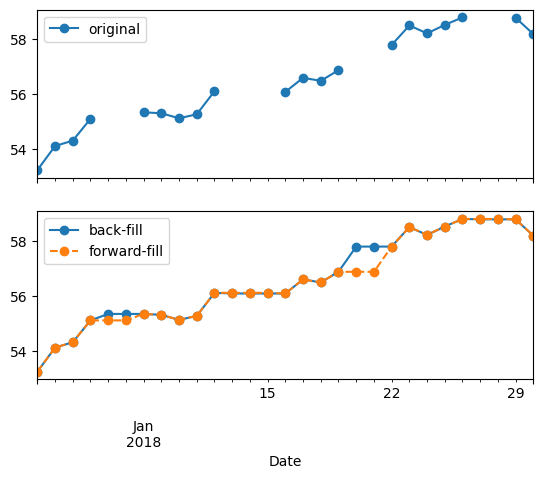

In [ ]:
fig, ax = plt.subplots(2, sharex=True)

data = sp500.iloc[:20]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')

data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')

ax[0].legend(["original"]);
ax[1].legend(["back-fill", "forward-fill"]);

### Time Shifts

El método `shift`, sirve para correr los datos un número dado veces.


In [ ]:
small = sp500.iloc[:30]
small

Ticker,GOOG
Date,
2018-01-02 00:00:00+00:00,53.250000
2018-01-03 00:00:00+00:00,54.124001
2018-01-04 00:00:00+00:00,54.320000
2018-01-05 00:00:00+00:00,55.111500
2018-01-08 00:00:00+00:00,55.347000
2018-01-09 00:00:00+00:00,55.313000
2018-01-10 00:00:00+00:00,55.130501
2018-01-11 00:00:00+00:00,55.276001
2018-01-12 00:00:00+00:00,56.112999


In [ ]:
small.shift(-5)

Ticker,GOOG
Date,
2018-01-02 00:00:00+00:00,55.313000
2018-01-03 00:00:00+00:00,55.130501
2018-01-04 00:00:00+00:00,55.276001
2018-01-05 00:00:00+00:00,56.112999
2018-01-08 00:00:00+00:00,56.088001
2018-01-09 00:00:00+00:00,56.598999
2018-01-10 00:00:00+00:00,56.489498
2018-01-11 00:00:00+00:00,56.875500
2018-01-12 00:00:00+00:00,57.790501


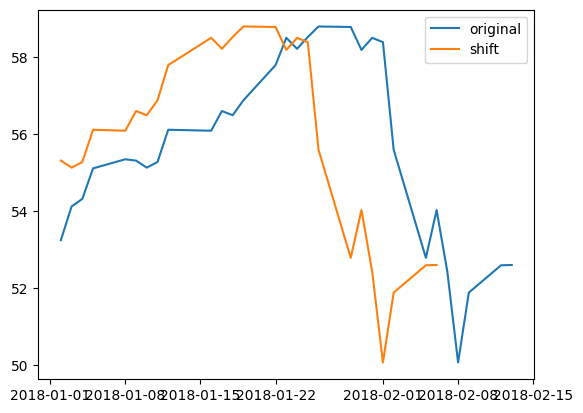

In [ ]:
plt.plot(small)
plt.plot(small.shift(-5))
plt.legend(["original", "shift"]);


Por ejemplo `shift` se puede usar para comparar valores entres años.

Podemos resamplear a valores diarios, y correr 365 veces para computar 1-año de diferencia de cotización para cada periodo de tiempo.

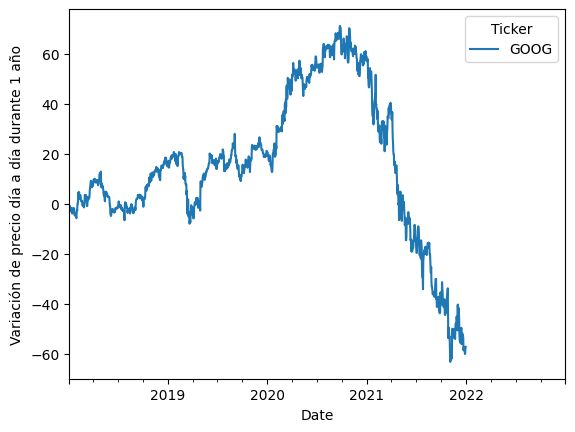

In [ ]:
sp500 = sp500.asfreq('D', method='ffill')

deltayear =  (sp500.shift(-365) - sp500)
deltayear.plot()

plt.ylabel('Variación de precio día a día durante 1 año');

### Rolling Windows

El cálculo de estadísticas continuas/moviles/rolling es un tercer tipo de operación específica de series temporales implementada por Pandas. Esto se puede lograr a través del metodo `rolling` de los objetos Series y DataFrame.

La función `rolling` en Pandas se utiliza para realizar cálculos en ventanas móviles sobre datos secuenciales. Una ventana móvil es un intervalo o subconjunto de datos de tamaño fijo que se mueve secuencialmente a través de un conjunto de datos más grande.

`rolling` devuelve una vista similar a la que vimos con la operación groupby y tienen una serie de operaciones de agregación de forma predeterminada.


Por ejemplo podemos realizar las estadisticas moviles tomando periodos de 365 días al centro para lograr **suavizar** la curva de precios.

In [ ]:
rolling = sp500.rolling(60, center=True)


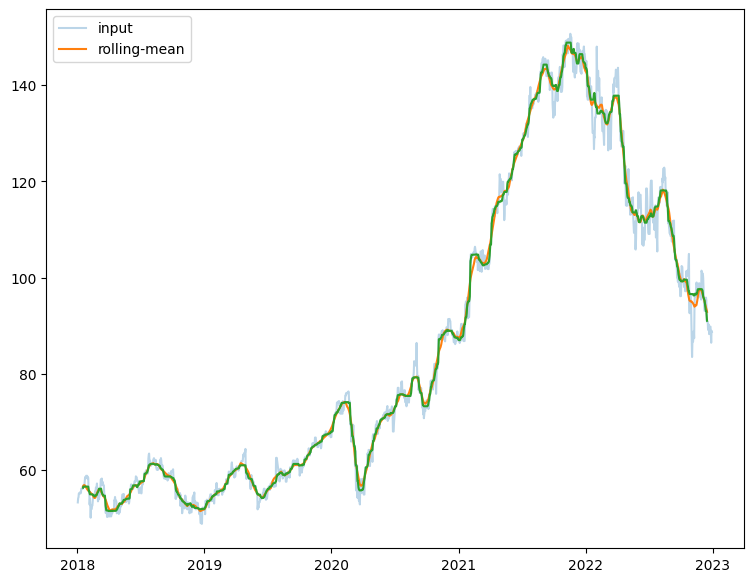

In [ ]:

plt.figure(figsize=(9,7))

plt.plot(sp500, alpha=0.3)
plt.plot(rolling.mean())
plt.plot(rolling.median())

plt.legend(['input', 'rolling-mean'], loc='upper left');



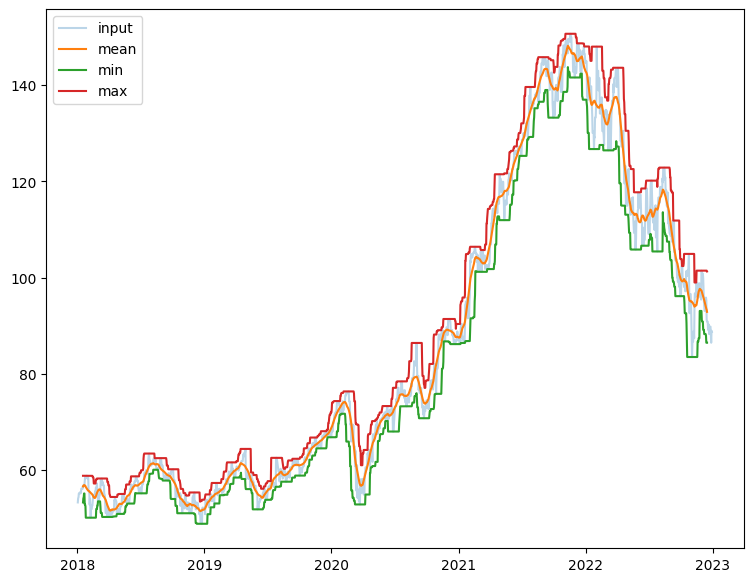

In [ ]:
plt.figure(figsize=(9,7))

plt.plot(sp500, alpha=0.3, label='input')
plt.plot(rolling.mean(), label='mean')
plt.plot(rolling.min(), label='min')
plt.plot(rolling.max(), label='max')

plt.legend(loc='upper left');

### EWM (Windows)


La función ewm en Pandas se utiliza para calcular medias móviles exponencialmente ponderadas (EWMA). A diferencia de las medias móviles simples, que dan el mismo peso a todos los datos dentro de la ventana móvil, las EWMA dan más peso a los datos más recientes y menos peso a los datos más antiguos.

Esto se logra aplicando un factor de ponderación exponencial a los datos dentro de la ventana móvil. El factor de ponderación se basa en un parámetro llamado alpha, que controla la rapidez con la que decaen los pesos. Un valor de alpha más alto da más peso a los datos más recientes, mientras que un valor de alpha más bajo da más peso a los datos más antiguos.

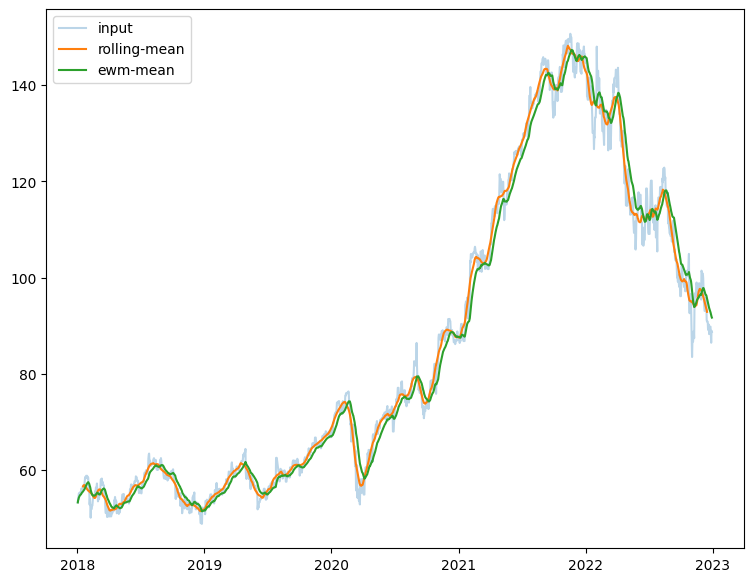

In [ ]:
plt.figure(figsize=(9,7))

rolling = sp500.rolling(30, center=True)
ewm = sp500.ewm(span=30)

plt.plot(sp500, alpha=0.3, label='input')
plt.plot(rolling.mean(), label='rolling-mean')
plt.plot(ewm.mean(), label='ewm-mean')

plt.legend(loc='upper left');

Expanding se puede usar para obtener los valores acumulados

### Expanding



La función expanding en Pandas se utiliza para realizar cálculos en ventanas móviles que se expanden a medida que avanzan por el conjunto de datos. Esto significa que la ventana móvil incluye todos los datos desde el inicio del conjunto de datos hasta el punto actual de iteración.

In [ ]:
expa = sp500.expanding()

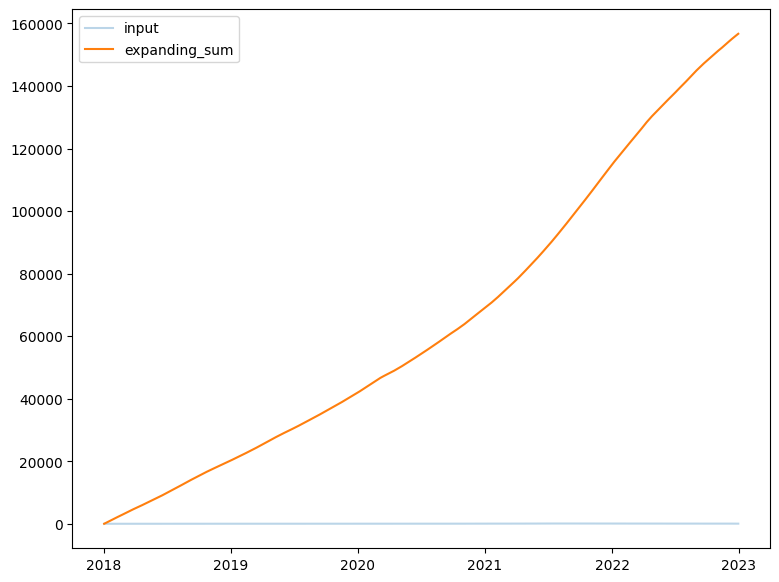

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(sp500, alpha=0.3)
plt.plot(expa.sum())

plt.legend(['input', 'expanding_sum'], loc='upper left');


\Expanding se puede usar para obtener los máximos acumulados

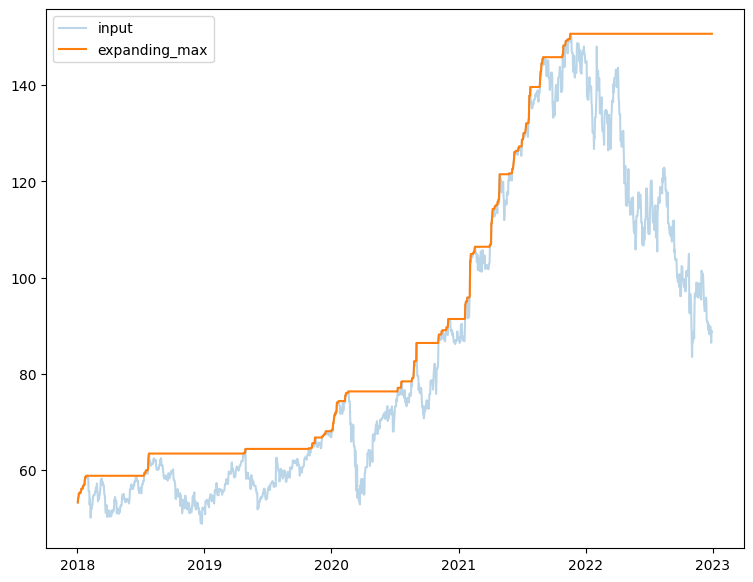

In [ ]:
plt.figure(figsize=(9,7))

plt.plot(sp500,alpha=0.3)
plt.plot(expa.max())
plt.legend(['input', 'expanding_max'], loc='upper left');



## Anexo Fechas en castellano

In [ ]:

# Instalamos locale es_AR, con encdoing de caracteres UTF-8
#!/usr/share/locales/install-language-pack "es_AR.UTF-8"
#!dpkg-reconfigure locales

# Reiniciamos python para que tome los nuevos locales
## NOTA: Para el caso de collab hay que hacerlo al principio del notebook
## Y se debe reiniciar el entorno de ejecucion.

## NOTA2: Si se quiere, se puede terminar python con este comando.
#import os
#os.kill(os.getpid(), 9)

Cambiamos a locale es_AR

In [ ]:
## NOTA: Para el caso de collab hay que hacerlo al principio del notebook
## Y se debe reiniciar el entorno de ejecucion.

#import locale

#locale.setlocale(locale.LC_ALL,'es_AR.UTF-8')


Parseamos una fecha y la imprimimos en castellano con el locales es_AR

In [ ]:
#from datetime import datetime

#ldate = datetime.strptime('01-ene-2019', '%d-%b-%Y')



In [ ]:

#ldate.strftime('%A')
